In [97]:
import pandas as pd
import numpy as np

In [98]:
df= pd.read_csv("train (1).csv")
test= pd.read_csv("test.csv")

In [99]:
print(df.shape, test.shape)

(8693, 14) (4277, 13)


In [100]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [101]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [102]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [103]:
df.describe(include=object)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


COLUMN SUMMARY

In [104]:
def column_summary(df):
    summary = pd.DataFrame()
    
    summary['Column Name'] = df.columns
    summary['Data Type'] = df.dtypes.values
    summary['Missing Values'] = df.isnull().sum().values
    summary['Unique Values'] = df.nunique().values

   # Separate summary for numerical columns
    numerical_cols = df.select_dtypes(include=['number'])
    
    summary_numerical = pd.DataFrame({
        'Column Name': numerical_cols.columns,
        'Mean': numerical_cols.mean(),
        'Standard Deviation': numerical_cols.std(),
        'Min': numerical_cols.min(),
        'Max': numerical_cols.max()
    }).reset_index(drop=True)
    
    # Merge both summaries (non-numerical columns won't have stats like mean)
    full_summary = pd.merge(summary, summary_numerical, on='Column Name', how='left') #pd.merge to combine the num columns with general col
        #'left' join ensures that non-numerical columns don't break the summary.
    return full_summary

# Call the function and print the summary
summary = column_summary(df)
print(summary)

     Column Name Data Type  Missing Values  Unique Values        Mean  \
0    PassengerId    object               0           8693         NaN   
1     HomePlanet    object             201              3         NaN   
2      CryoSleep    object             217              2         NaN   
3          Cabin    object             199           6560         NaN   
4    Destination    object             182              3         NaN   
5            Age   float64             179             80   28.827930   
6            VIP    object             203              2         NaN   
7    RoomService   float64             181           1273  224.687617   
8      FoodCourt   float64             183           1507  458.077203   
9   ShoppingMall   float64             208           1115  173.729169   
10           Spa   float64             183           1327  311.138778   
11        VRDeck   float64             188           1306  304.854791   
12          Name    object             200         

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [106]:
df['VRDeck'].isna().sum()


188

In [107]:
df['Transported'].value_counts()


Transported
True     4378
False    4315
Name: count, dtype: int64

In [108]:
df['Transported'].value_counts(normalize=True)

Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64

In [109]:
print('The percentage of missing cells in the data are:',round(df.isna().sum().sum() / df.size * 100, 1),'%')

The percentage of missing cells in the data are: 1.9 %


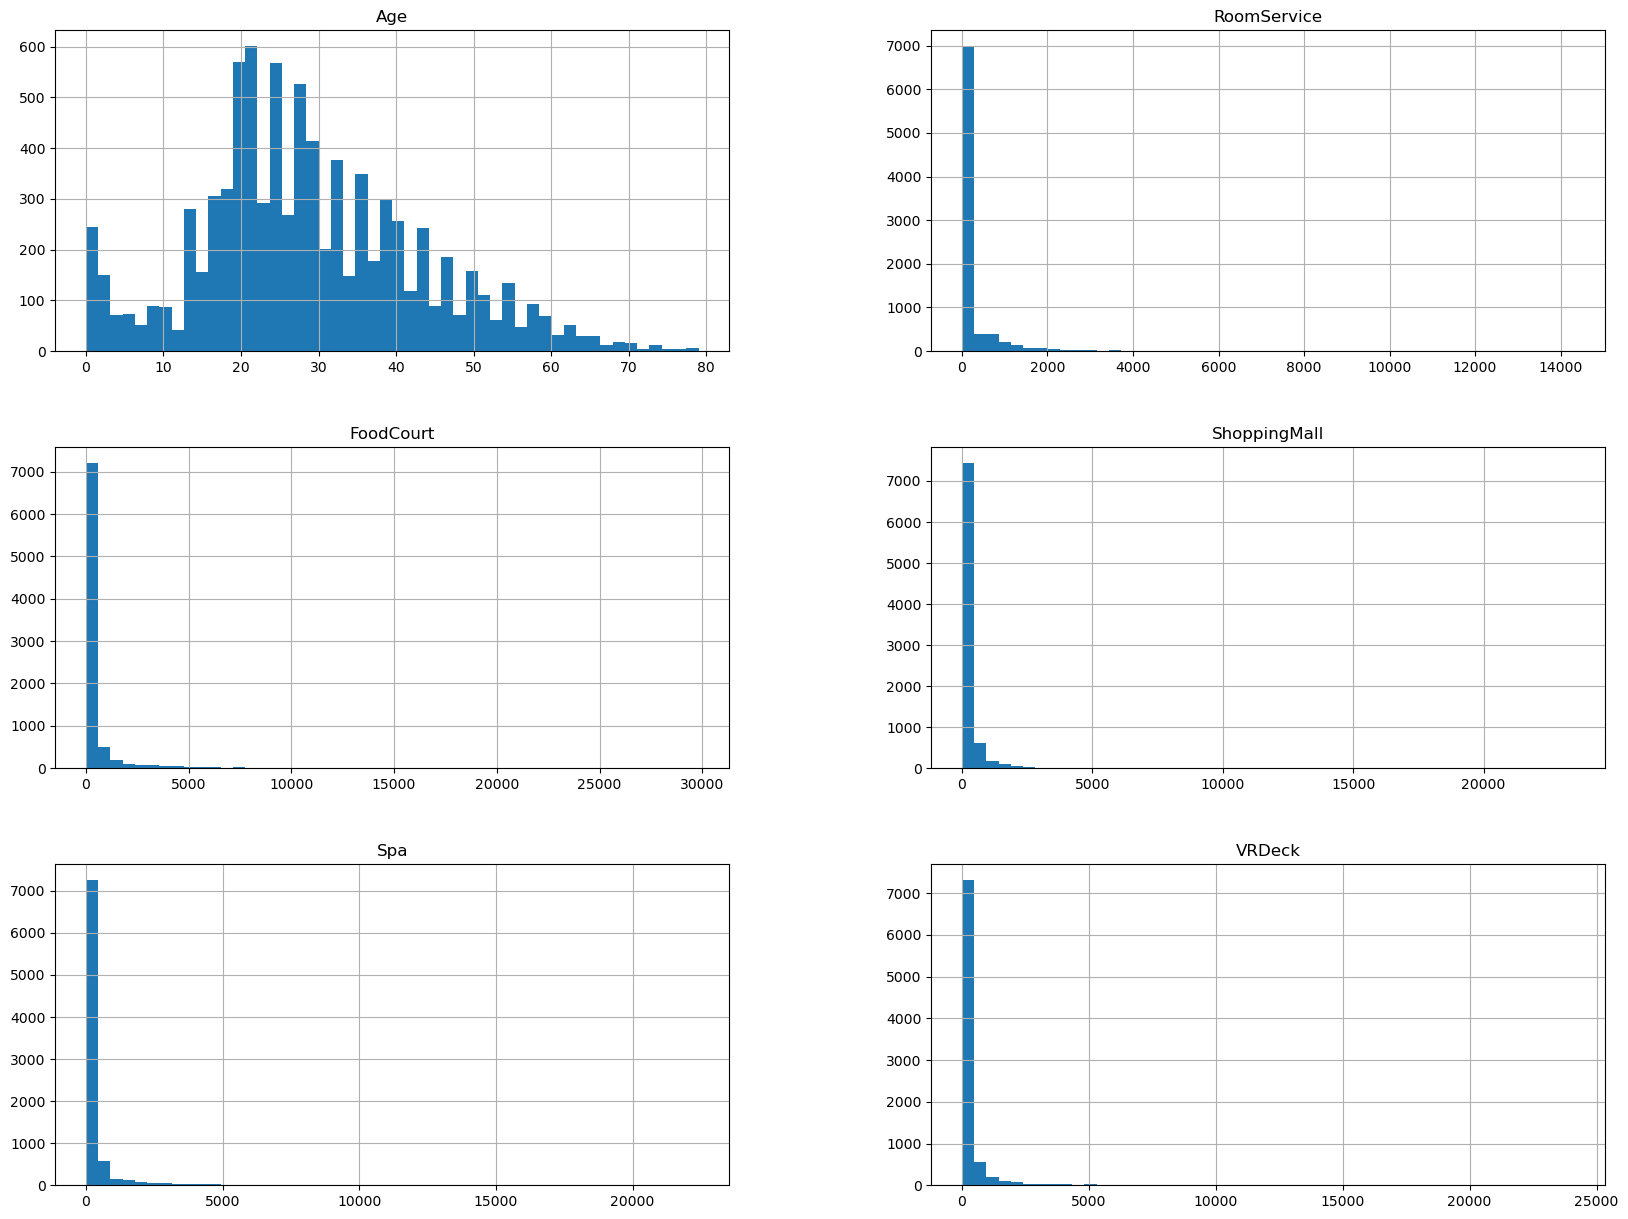

In [110]:
import	matplotlib.pyplot	as	plt
df.hist(bins=50,	figsize=(20,15))
plt.show()

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
SO, 

In [112]:
#gathering the categorical columns together
req_col = df.drop(columns=['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'])
print(req_col)

     PassengerId HomePlanet CryoSleep     Cabin    Destination    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  False   
...          ...        ...       ...       ...            ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  False   

                   Name  Transported  
0       Maham Ofracculy        False  
1          Juanna Vines         True  
2     

In [113]:
negative_age_df = df[df['Age'] < 0]

# Display rows with negative Victim_Age values
negative_age_df

age = df['Age'].median()
df["Age"]= df['Age'].fillna(age)

K-Nearest Neighbors (KNN) imputation finds the most similar instances and imputes the missing value based on their values.
#BooleanImputation

In [114]:
from sklearn.impute import KNNImputer

# Initialize the imputer
imputer = KNNImputer(n_neighbors=5)

# Apply KNN Imputation
df[['CryoSleep', 'VIP','Transported']] = imputer.fit_transform(df[['CryoSleep', 'VIP','Transported']])


MEDIAN IMPUTATION for columns having prices as this is more robust especially if the data  is skewed.

In [115]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore',)


# Fill missing values with the median

df['RoomService'].fillna(df['RoomService'].median(), inplace=True)
df['FoodCourt'].fillna(df['FoodCourt'].median(), inplace=True)
df['ShoppingMall'].fillna(df['ShoppingMall'].median(), inplace=True)
df['Spa'].fillna(df['Spa'].median(), inplace=True)
df['VRDeck'].fillna(df['VRDeck'].median(), inplace=True)

BINARY ENCODING

In [116]:
# Convert True/False to 1/0
df['VIP'] = df['VIP'].astype(int )
df['CryoSleep'] = df['CryoSleep'].astype(int)
df['Transported'] = df['Transported'].astype(int)

print(df)

     PassengerId HomePlanet  CryoSleep     Cabin    Destination   Age  VIP  \
0        0001_01     Europa          0     B/0/P    TRAPPIST-1e  39.0    0   
1        0002_01      Earth          0     F/0/S    TRAPPIST-1e  24.0    0   
2        0003_01     Europa          0     A/0/S    TRAPPIST-1e  58.0    1   
3        0003_02     Europa          0     A/0/S    TRAPPIST-1e  33.0    0   
4        0004_01      Earth          0     F/1/S    TRAPPIST-1e  16.0    0   
...          ...        ...        ...       ...            ...   ...  ...   
8688     9276_01     Europa          0    A/98/P    55 Cancri e  41.0    1   
8689     9278_01      Earth          1  G/1499/S  PSO J318.5-22  18.0    0   
8690     9279_01      Earth          0  G/1500/S    TRAPPIST-1e  26.0    0   
8691     9280_01     Europa          0   E/608/S    55 Cancri e  32.0    0   
8692     9280_02     Europa          0   E/608/S    TRAPPIST-1e  44.0    0   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck     

In [117]:
df['TotalSpent'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
amt_spent = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpent']]
print(amt_spent)

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  TotalSpent
0             0.0        0.0           0.0     0.0     0.0         0.0
1           109.0        9.0          25.0   549.0    44.0       736.0
2            43.0     3576.0           0.0  6715.0    49.0     10383.0
3             0.0     1283.0         371.0  3329.0   193.0      5176.0
4           303.0       70.0         151.0   565.0     2.0      1091.0
...           ...        ...           ...     ...     ...         ...
8688          0.0     6819.0           0.0  1643.0    74.0      8536.0
8689          0.0        0.0           0.0     0.0     0.0         0.0
8690          0.0        0.0        1872.0     1.0     0.0      1873.0
8691          0.0     1049.0           0.0   353.0  3235.0      4637.0
8692        126.0     4688.0           0.0     0.0    12.0      4826.0

[8693 rows x 6 columns]


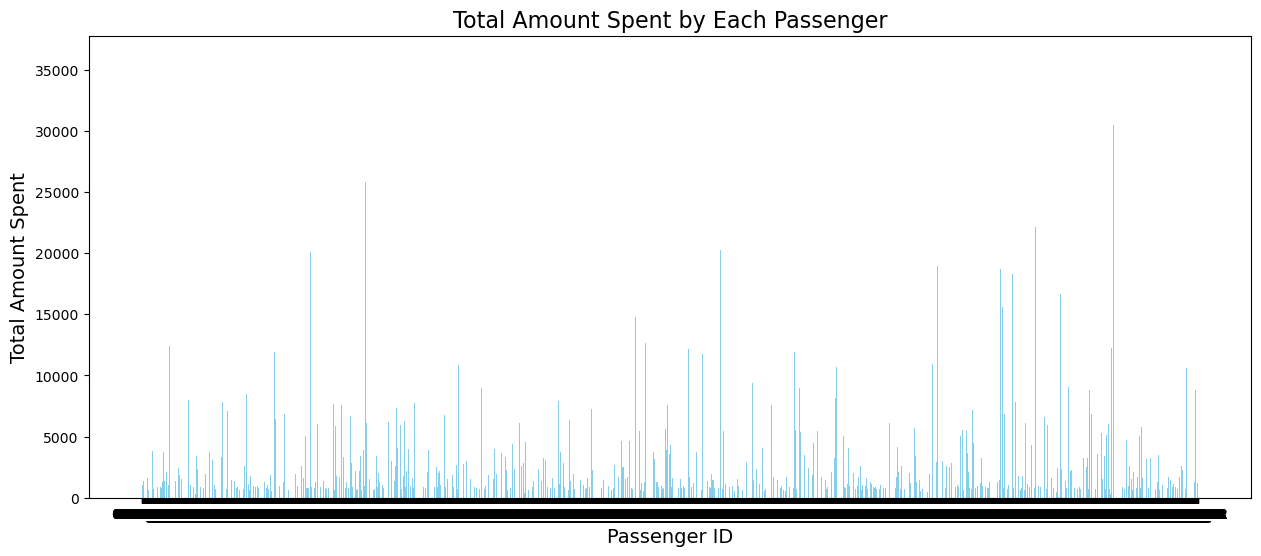

In [118]:
# Plotting the total amount spent by each individual
plt.figure(figsize=(15, 6))
plt.bar(df['PassengerId'], df['TotalSpent'], color='skyblue')

# Adding title and labels
plt.title('Total Amount Spent by Each Passenger', fontsize=16)
plt.xlabel('Passenger ID', fontsize=14)
plt.ylabel('Total Amount Spent', fontsize=14)

# Displaying the plot
plt.show()

In [119]:
print(df['TotalSpent'].max())
print(df['TotalSpent'].min())

35987.0
0.0


Splitting the dataset

In [96]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)